In [ ]:
# Import pregnancy data

In [25]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

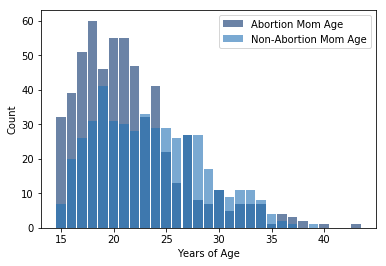

In [90]:
# Chapter 1 - Exercise 3:
# Question: In 2002, were fifteen-to-fourty-four-year-old American women who had
#           an abortion typically younger than those who decided not to abort?
abortion_mom_ages = [age for age in preg[preg.pregend1==3].ageatend if age in range(15, 45)]
non_abortion_mom_ages = [age for age in preg[preg.pregend1!=3].ageatend if age in range(15, 45)]
abortion_mom_age_hist = thinkstats2.Hist( abortion_mom_ages, label = 'Abortion Mom Age' )
thinkplot.Hist( abortion_mom_age_hist )
thinkplot.Config( xlabel='Years of Age', ylabel='Count' )
non_abortion_mom_age_hist = thinkstats2.Hist( non_abortion_mom_ages, label = 'Non-Abortion Mom Age' )
thinkplot.Hist( non_abortion_mom_age_hist )
thinkplot.Config( xlabel='Years of Age', ylabel='Count' )

In [93]:
# Chapter 1 - Exercise 3 (continued)

#abortion_mom_age_mean = sum( abortion_mom_ages ) / len( abortion_mom_ages )
#non_abortion_mom_age_mean = sum( non_abortion_mom_ages ) / len( non_abortion_mom_ages )
#diff_btwn_means = abortion_mom_age_mean - non_abortion_mom_age_mean
#print( "mean abortion mom age - mean non-abortion mom age = " + str( diff_btwn_means ) )

print( "The histograms reveal that both data sets are left-skewed.\nBecause the median is a more robust measure of the average,\nlet us compare the averages by comparing the medians." )
print()
abortion_mom_age_median = abortion_mom_ages[len(abortion_mom_ages)//2]
non_abortion_mom_age_median = non_abortion_mom_ages[len(non_abortion_mom_ages)//2]
diff_btwn_medians = abortion_mom_age_median - non_abortion_mom_age_median
print( "median abortion mom age - median non-abortion mom age = " + str( diff_btwn_medians ) + " < 0" )
print()
print( "Thus, in 2002, fifteen-to-fourty-four-year-old American women\nwho had an abortion were typically younger than those who did not." )

The histograms reveal that both data sets are left-skewed.
Because the median is a more robust measure of the average,
let us compare the averages by comparing the medians.

median abortion mom age - median non-abortion mom age = -2.0 < 0

Thus, in 2002, fifteen-to-fourty-four-year-old American women
who had an abortion were typically younger than those who did not.


In [122]:
# Chapter 2 - Exercise 3:
def Mode( a_hist ):
    current_mode = 0
    for age in abortion_mom_age_hist:
        if abortion_mom_age_hist[age] > abortion_mom_age_hist[current_mode]:
            current_mode = age
    return current_mode

def AllModes( a_hist ):
    list_of_tuples = [0] * len( a_hist ) # initialize array
    num_tuples = 0
    for value in a_hist:
        list_of_tuples[num_tuples] = (value, a_hist[value])
        index = num_tuples
        while index > 0 and list_of_tuples[index][1] > list_of_tuples[index-1][1]:
            temp = list_of_tuples[index]
            list_of_tuples[index] = list_of_tuples[index-1]
            list_of_tuples[index-1] = temp
            index -= 1
        num_tuples += 1
    return list_of_tuples

In [127]:
# Chapter 2 - Exercise 4:

def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

live = preg[preg.outcome==1]
firsts = live[live.birthord==1]
others = live[live.birthord!=1]
cohens_d = CohenEffectSize( firsts.birthwgt_lb, others.birthwgt_lb )
print( "Cohen's difference = " + str( cohens_d ) + " < 0" )
print( "Thus, firstborns are typically lighter than others." )
print( "From Chapter 2, Exercise 2, we know that Cohen's difference of firstborns' pregnancy length\nversus that of others is 0.028879044654449883, which is not nearly as significant." )

Cohen's difference = -0.108450242544 < 0
Thus, firstborns are typically lighter than others.
From Chapter 2, Exercise 2, we know that Cohen's difference of firstborns' pregnancy length
versus that of others is 0.028879044654449883, which is not nearly as significant.
